In [1]:
import pandas as pd
import numpy as np

In [2]:
vac = pd.read_csv('https://raw.githubusercontent.com/Murivianna/stats/main/vaccination%20EU.csv')

The referent database contain data about the vaccination for Covid-19 in countries members of the EU. Countries in the European Union are requested to report their data about vaccination daily. Due to the vaccine program the data presented in this study is only for example purpose and may have changes after this study is done. Please also consider that one of the variables (Vaccine)chosen for this study is qualitative and it is represent by an acronym, for easy search the representation in the graphs and tables are explained as follow ABREVIATON = Name of the vaccine (Lab): COM = Comirnaty (Pfizer_BioNTech) // MOD = mRNA-1273 (Moderna) // CN = BBIBV-CorV (CNBG) //SIN = Coronavac (Sinovac) // SPU = Sputnik V (Gamaleya Research Institute) // AZ = AZD1222 (AstraZeneca) // UNK = UNKNOWN.

The full dictionary of the data can be found here: https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-03-2021.pdf 

Database download from: https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea on 30 March 2021. 

In [3]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19118 entries, 0 to 19117
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearWeekISO          19118 non-null  object 
 1   FirstDose            19118 non-null  int64  
 2   FirstDoseRefused     9187 non-null   float64
 3   SecondDose           19118 non-null  int64  
 4   UnknownDose          19118 non-null  int64  
 5   NumberDosesReceived  3103 non-null   float64
 6   Region               19118 non-null  object 
 7   Population           19118 non-null  int64  
 8   ReportingCountry     19118 non-null  object 
 9   TargetGroup          19118 non-null  object 
 10  Vaccine              19118 non-null  object 
 11  Denominator          14445 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.8+ MB


In [4]:
vac.head

<bound method NDFrame.head of       YearWeekISO  FirstDose  FirstDoseRefused  SecondDose  UnknownDose  \
0        2020-W53          0               0.0           0            0   
1        2020-W53       2627               0.0           0            0   
2        2020-W53          0               0.0           0            0   
3        2020-W53          0               0.0           0            0   
4        2020-W53       2354               0.0           0            0   
...           ...        ...               ...         ...          ...   
19113    2021-W11      59233               NaN       12671            0   
19114    2021-W11       1269               NaN        9469            0   
19115    2021-W12      34812               NaN        8527            0   
19116    2021-W12       7538               NaN           1            0   
19117    2021-W12       4762               NaN        2467            0   

       NumberDosesReceived Region  Population ReportingCountry Target

The 2 variables chosen for this study  are "Vaccine" and "Population"

In [5]:
average = vac["Population"].mean()
print(average) 

27356825.628360707


In [6]:
middlePoint = vac["Population"].median()
print(middlePoint)

37958138.0


In [7]:
trend = vac["Population"].mode()
print(trend)

0    37958138
dtype: int64


calculating its standard deviation

In [8]:
vac["Population"].std()

22017589.57657313

Calculating the 5 number summary

In [9]:
minimum = vac["Population"].min()
maximum = vac["Population"].max()
quartiles = np.percentile(vac["Population"], [25,75])
median = vac["Population"].median()
print(median)
print(minimum)
print(maximum)

37958138.0
38747
83166711


In [10]:
vac["Population"].describe()

count    1.911800e+04
mean     2.735683e+07
std      2.201759e+07
min      3.874700e+04
25%      5.525292e+06
50%      3.795814e+07
75%      3.795814e+07
max      8.316671e+07
Name: Population, dtype: float64

In [11]:
vac["Population"].describe()


count    1.911800e+04
mean     2.735683e+07
std      2.201759e+07
min      3.874700e+04
25%      5.525292e+06
50%      3.795814e+07
75%      3.795814e+07
max      8.316671e+07
Name: Population, dtype: float64

Using appropriate graphics, plot the variables to get a better idea of its dispersion. 

<AxesSubplot:>

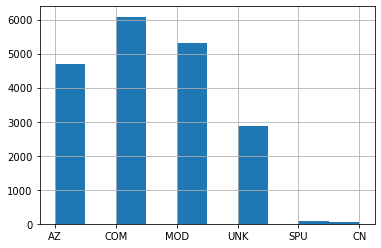

In [12]:
vac["Vaccine"].hist()

In [13]:
vac["Vaccine"].value_counts()

COM    6084
MOD    5323
AZ     4682
UNK    2879
SPU      90
CN       60
Name: Vaccine, dtype: int64

<AxesSubplot:>

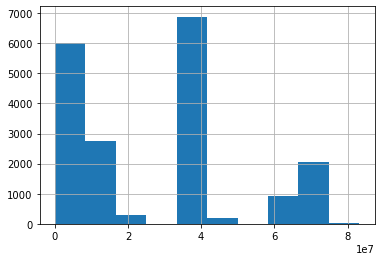

In [14]:
vac["Population"].hist()

Is it a normal distribuition? Provide a short analysis looking at the results you got in the previous items.

<AxesSubplot:>

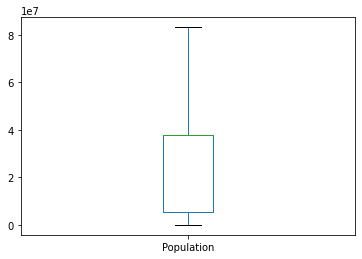

In [15]:
vac["Population"].plot.box()

Considering the large distance between the min and max, between the  1st and 3rd quarterly,  provide in the table in item 6, it shows it is not a normal distribution. Also in the graph in item 7 it is possible to visualize the up and down of the bars and for most important of all information mentioned, checking the table in item number 6, it is possible to compare the results of Mean and Std showing that the variable 'Population' is not normal distribution. 


Analising the previous data available in the items below, especially in items number 6 and 7, it is possible to see that the both variables have outliers or missing values. Considering for example that the Vaccines named SPU and CN have extremely least inputs than COM and MOD, for example. Also, it is possible to verify in the results below that the mean has a decrease when we cut 10% of the data in the both ends. 

In [16]:
from scipy import stats

In [17]:
stats.trim_mean(vac["Population"], 0.1)

25577583.31609571

In [18]:
average = vac["Population"].mean()
print(average) 

27356825.628360707


Pick 2 variables and plot their relation using an appropriate graphic. Provide a short analysis of what you observed

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

According to the graph below it is related that the numbers of doses distributed between EU countries is according to their population, this means for example, Ireland will receive much less doses than Spain, but in the per capita rate both countries will have a similar index. 

<AxesSubplot:xlabel='Population', ylabel='NumberDosesReceived'>

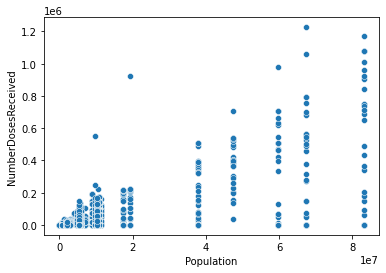

In [20]:
sns.scatterplot(data=vac, x="Population", y="NumberDosesReceived")